<h1>Multiple Linear Regression</h1>


In [1]:
import pandas as pd
import numpy as np

We will consider now multiple features from our sample set. So we will work with a feature matrix $X$ of shape $(m,D)$ where
$m$ is the number of samples and $D$ the number of features. Our label vector $Y$ is of length $m$. 
Our aim is to determine a vector of wights $W$ of length $D+1$ ($D$ features plus the intercept)
The estimation for a given set of features is:
$${\hat y}= w_0+\sum_1^Dx_iw_i$$

To vectorize it is more convenient to add a column of $1$'s as first column of the feature matrix, so the estimation vector for a whole sample set will be:
$${\hat Y}=X \cdot W$$

In [2]:
#predict the output given W, and the feature matrix, the vector of weights, W[0] is the intercept
def predict_output(X, W):
    pred=np.matmul(X,W)
    return pred
    

To measure the cost we will use a similar formula to the one we used for simple linear regression:

$$cost=\frac{1}{2m}\sum({\hat y_i}-y_i)^2$$
the only difference is that we divide by $2m$ instead of dividing by $m$. This makes the computation simpler.
In verctor form the cost is:

$$cost=\frac{1}{2m}({\hat Y -Y})^t \cdot({\hat Y -Y})$$

In [3]:
#Compute cost
def get_cost(X, Y, W):
    #X is the feature vector (m,D+1)
    #Y is the labels vector (m,1)
    m=X.shape[0]
    pred=predict_output(X, W)
    res=pred-Y
    sqrd=res**2
    cost=np.sum(sqrd)/(2*m)
    return cost

There is an exact formula for multiple regression, if we calculate the gradient of the cost with respect to $W$ and solve this gradient =0 we get:

$$W=(X^tX)^{-1}X^tY$$

However we cannot assure that the matrix $X^tX$ is invertible, and even if it is, the computational cost to find $W$ this way can be high. Instead we better use gradient descent.

The gradient of the cost with respect to $W$ is:

$$\nabla cost =  \frac{-1}{m}X^t (Y-XW)$$

In [4]:
def gradient(X,Y,W):
    m=X.shape[0]
    preds=predict_output(X, W)
    error=Y-preds
    grad=-np.matmul(X.T,error)/m
    return grad

The weights update is the same as the case for simple regression:

$$W=W- \eta \nabla cost$$

In [5]:
def gradient_descent_mult(X, Y, learning_rate, tolerance, initial_weights,max_iter=5000):
    #X is the feature matrix
    #Y is the output vector

    W=initial_weights
    converged = False
    k=0
    while k<max_iter and not converged:
        if k % 1000 == 0:
            print("Iteration: "+str(k))
        grad=gradient(X,Y,W)
        W=W-learning_rate*grad
        grad_norm=np.linalg.norm(grad)
        k=k+1
        if grad_norm < tolerance:
            converged= True
            print("Converged at iteration "+str(k))
   
    return W

Let's load  our data set.

In [6]:
house_prices=pd.read_csv("houseprices.csv")

In [7]:
house_prices.head()

,Unnamed: 0,price,LotSize,Age,LandValue,LivingArea,Bedrooms,Fireplaces,Bathrooms,Rooms,Heating,Fuel,Sewer,Waterfront,NewConstruction
0,1,132500,0.09,42,50000,906,2,1,1.0,5,electric,electric,septic,No,No
1,2,181115,0.92,0,22300,1953,3,0,2.5,6,hot water/steam,gas,septic,No,No
2,3,109000,0.19,133,7300,1944,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No
3,4,155000,0.41,13,18700,1944,3,1,1.5,5,hot air,gas,septic,No,No
4,5,86060,0.11,0,15000,840,2,0,1.0,3,hot air,gas,public/commercial,No,Yes


Since we will work now with multiple features, it will be useful to convert the set of our features of interest to a numpy matrix. As pointed above, it is more convenient to add a column of 1's to the matrix and so the intercept b will be part of the weights vector $W$.

In [8]:
#Given a list of features convert the corresponding dataframe to a numpy matrix
def get_numpy_matrix(dataframe, features, output):
    dftemp=dataframe.copy()
    dftemp["ones"]=1. #add a column of 1s to the dataframe
    features=["ones"]+features #add the ones name to the start of the features list
    feat_dataframe=dftemp[features]
    X=feat_dataframe.values
    Y=dataframe[output].values
    return X,Y

Now we split our data set onto training set and test set.

In [9]:
#split the dataframe into train and test sets
def trainset__testset_split(df, train_percent=.8, seed=None):
    np.random.seed(seed)
    m = len(df.index)
    shuffle = np.random.permutation(df.index)
    train_end = int(train_percent * m)
    train = df.loc[shuffle[:train_end]] #use loc instead of ix
    test = df.loc[shuffle[train_end:]]
    return train, test

In [10]:
train_set, test_set= trainset__testset_split(house_prices, train_percent=.8, seed=0)

<h2>One Feature</h2>


First, we are going to apply our algorithm, intended for multiple features, to a single feature to see if it does the same as our simple feature algorithm.

In [11]:
X, Y=get_numpy_matrix(house_prices, ["LivingArea"],"price")

In [12]:
features = ['LivingArea']
output = 'price'
(X_1, Y_1) = get_numpy_matrix(train_set, features, output)
initial_weights = np.array([15000., 10.])
learning_rate = 1.e-10
tolerance = 2.e3

In [13]:
weights_1=gradient_descent_mult(X_1, Y_1, learning_rate, tolerance, initial_weights, 60000)
print("The weight vector is: "+str(weights_1))

Iteration: 0
Iteration: 1000
Iteration: 2000
Iteration: 3000
Iteration: 4000
Iteration: 5000
Iteration: 6000
Iteration: 7000
Iteration: 8000
Iteration: 9000
Iteration: 10000
Iteration: 11000
Iteration: 12000
Iteration: 13000
Iteration: 14000
Iteration: 15000
Iteration: 16000
Iteration: 17000
Iteration: 18000
Iteration: 19000
Iteration: 20000
Iteration: 21000
Iteration: 22000
Iteration: 23000
Iteration: 24000
Iteration: 25000
Iteration: 26000
Iteration: 27000
Iteration: 28000
Iteration: 29000
Iteration: 30000
Iteration: 31000
Iteration: 32000
Iteration: 33000
Iteration: 34000
Converged at iteration 34944
The weight vector is: [15000.05256074   111.66043499]


Notice that the values are practically the same that we obtained with our simple feature gradient descent, however this new algorithm takes more iterations (but the iterations takes less time). This is due to the slight change we did on the cost function (divide by $2m$ instead of $m$). 

In [14]:
cost_train_1 = get_cost(X_1,Y_1, weights_1)
print(np.format_float_scientific(cost_train_1))

2.2124293702625685e+09


Let's evaluate on the test set.

In [15]:
(X_test_1, Y_test_1) = get_numpy_matrix(test_set, features, output)

Now we calculate the cost on the test set.

In [16]:
cost_test_1 = get_cost(X_test_1 ,Y_test_1, weights_1)
print(np.format_float_scientific(cost_test_1))

3.07864173161274e+09


We consider now an additional feature, "LotSize". And apply gradient descent to two features.

<h2>Two Feature</h2>


In [17]:
features_2 = ['LivingArea', 'LotSize'] # sqft_living15 is the average squarefeet for the nearest 15 neighbors. 
output = 'price'
(X_2, Y_2) = get_numpy_matrix(train_set, features_2, output)
initial_weights = np.array([15000., 10., 10.])
learning_Rate = 1.e-10
tolerance = 1e4

In [18]:
weights_2=gradient_descent_mult(X_2, Y_2, learning_rate, tolerance, initial_weights, 100000)
print("The weight vector is: "+str(weights_2))

Iteration: 0
Iteration: 1000
Iteration: 2000
Iteration: 3000
Iteration: 4000
Iteration: 5000
Iteration: 6000
Iteration: 7000
Iteration: 8000
Iteration: 9000
Iteration: 10000
Iteration: 11000
Iteration: 12000
Iteration: 13000
Iteration: 14000
Iteration: 15000
Iteration: 16000
Iteration: 17000
Iteration: 18000
Iteration: 19000
Iteration: 20000
Iteration: 21000
Iteration: 22000
Iteration: 23000
Iteration: 24000
Iteration: 25000
Iteration: 26000
Iteration: 27000
Iteration: 28000
Iteration: 29000
Iteration: 30000
Converged at iteration 30502
The weight vector is: [1.50000524e+04 1.11655552e+02 1.00401628e+01]


The cost is:

In [19]:
cost_train_2 = get_cost(X_2,Y_2, weights_2)
print(np.format_float_scientific(cost_train_2))

2.2123902948132834e+09


In [20]:
#difference between costs for the cases with one and two features.
print(np.format_float_scientific(cost_train_1-cost_train_2))

3.9075449285030365e+04


Let's see what happens with the test set.

In [21]:
(X_test_2, Y_test_2) = get_numpy_matrix(test_set, features_2, output)

In [22]:
cost_test_2 = get_cost(X_test_2,Y_test_2, weights_2)
print(np.format_float_scientific(cost_test_2))

3.078679893244889e+09


In [23]:
print(np.format_float_scientific(cost_test_1- cost_test_2))

-3.8161632148742676e+04


We can plot all this using matplotlib.

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [31]:
#This sets up the size of the figures, a bit larger than default.
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

We define the function determined by the weights obtained (it is a plane).

In [32]:
def f(x, y):
    return weights_2[0]+ weights_2[1]*x+weights_2[2]*y
    #return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(0, 3000, 30)
y = np.linspace(-6, 15, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

This is the plot of the training set and the aproximations determined by the weights.

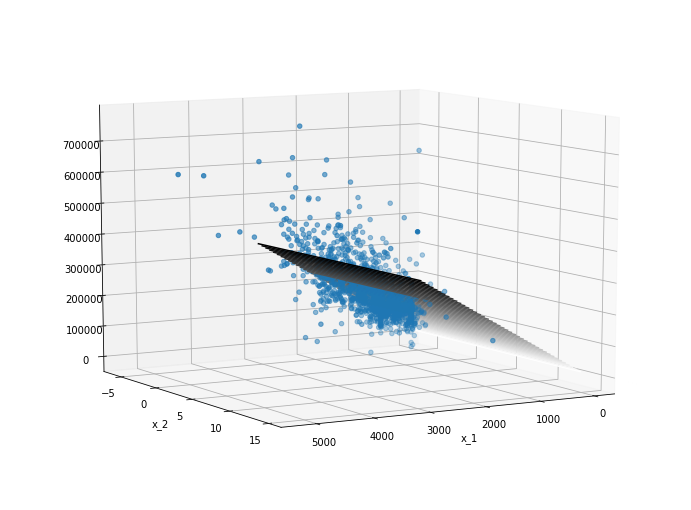

In [33]:
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('')
ax.scatter3D(X_2[:,1], X_2[:,2], Y_2, cmap='Greens')
ax.view_init(10, 60);

We can plot this with different view points using ax.view.

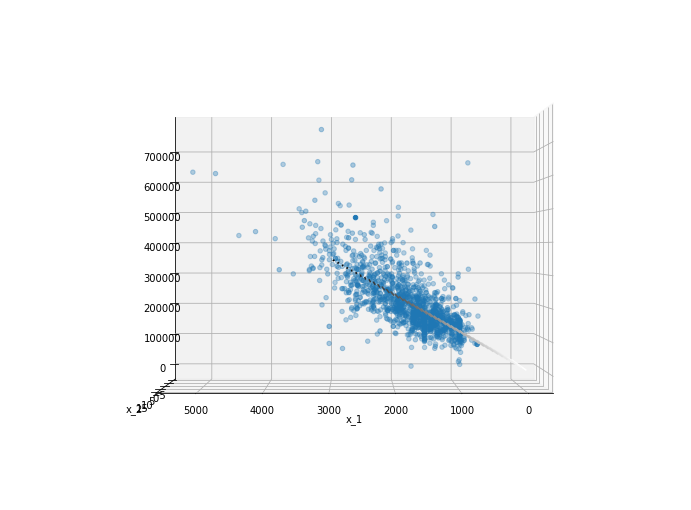

In [34]:
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('')
ax.scatter3D(X_2[:,1], X_2[:,2], Y_2, cmap='Greens')
ax.view_init(0, 90);

<h2>Three Feature</h2>


Now we add a third feature and see what happens.

In [35]:
features_3 = ['LivingArea', 'LotSize','Bedrooms'] # sqft_living15 is the average squarefeet for the nearest 15 neighbors. 
output = 'price'
(X_3, Y_3) = get_numpy_matrix(train_set, features_3, output)
initial_weights = np.array([15000., 10., 10.,10.])
learning_Rate = 1.e-10
tolerance = 1e4

In [36]:
weights_3=gradient_descent_mult(X_3, Y_3, learning_rate, tolerance, initial_weights, 100000)
print("The weight vector is: "+str(weights_3))

Iteration: 0
Iteration: 1000
Iteration: 2000
Iteration: 3000
Iteration: 4000
Iteration: 5000
Iteration: 6000
Iteration: 7000
Iteration: 8000
Iteration: 9000
Iteration: 10000
Iteration: 11000
Iteration: 12000
Iteration: 13000
Iteration: 14000
Iteration: 15000
Iteration: 16000
Iteration: 17000
Iteration: 18000
Iteration: 19000
Iteration: 20000
Iteration: 21000
Iteration: 22000
Iteration: 23000
Iteration: 24000
Iteration: 25000
Iteration: 26000
Iteration: 27000
Iteration: 28000
Iteration: 29000
Iteration: 30000
Iteration: 31000
Converged at iteration 31072
The weight vector is: [1.50000524e+04 1.11638755e+02 1.00403788e+01 1.01564894e+01]


In [37]:
cost_train_3 = get_cost(X_3,Y_3, weights_3)
print(np.format_float_scientific(cost_train_3))

2.2124436771532326e+09


In [38]:
(X_test_3, Y_test_3) = get_numpy_matrix(test_set, features_3, output)

In [39]:
cost_test_3 = get_cost(X_test_3,Y_test_3, weights_3)
print(np.format_float_scientific(cost_test_3))

3.0787502274431973e+09


In [40]:
print(np.format_float_scientific(cost_test_3- cost_test_2))

7.033419830846786e+04
